In [1]:
#import bibliothèques
from sklearn import preprocessing
from joblib import dump, load

from datetime import datetime
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced

import pandas as pd
import numpy as np

from tensorflow.keras.layers import Input, Dense, Dropout #Pour instancier une couche Dense et une d'Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
# chargements des jeux de données d'entrainement et et de test
pd.set_option('display.max_columns', None)

data_path = '../../Data'
models_path = '../../Models'

X_train = pd.read_csv('{0}/X_train.zip'.format(data_path), compression=dict(method='zip', archive_name='X_train.csv'))
X_test = pd.read_csv('{0}/X_test.zip'.format(data_path), compression=dict(method='zip', archive_name='X_test.csv'))
y_train = pd.read_csv('{0}/y_train.zip'.format(data_path), compression=dict(method='zip', archive_name='y_train.csv'))
y_test = pd.read_csv('{0}/y_test.zip'.format(data_path), compression=dict(method='zip', archive_name='y_test.csv'))

y_train = y_train['grav']
y_test = y_test['grav']


In [3]:
us = RandomUnderSampler()
X_train, y_train = us.fit_resample(X_train, y_train)

Réseau de neurones denses

In [4]:
model = Sequential()

model.add(Dense(units = 256, activation = 'relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(rate=.3))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate=.3))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate=.3))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate=.3))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dropout(rate=.3))
model.add(Dense(units = 4, activation = 'softmax'))


model.summary()


u:\Eric\GIT\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,388 (431.20 KB)

 Trainable params: 110,388 (431.20 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:


y_test = to_categorical(y_test, num_classes=4)
y_train= to_categorical(y_train, num_classes=4)

In [6]:
m = Recall(class_id = 3, name = 'recall_class_3')


In [ ]:
opt = Adam(learning_rate=0.01)
model.compile(loss = "categorical_crossentropy",
              optimizer = opt,
              metrics = ['accuracy',m])


In [8]:
y_train.shape

(38860, 4)

In [ ]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 16, validation_split = .2)


Epoch 1/200
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.2019 - recall_class_3: 7.7552e-05 - val_loss: 2.3577 - val_recall_class_3: 0.0000e+00
Epoch 2/200
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1343 - recall_class_3: 8.5838e-04 - val_loss: 2.7304 - val_recall_class_3: 0.0000e+00
Epoch 3/200
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1934 - recall_class_3: 0.0000e+00 - val_loss: 2.5798 - val_recall_class_3: 0.0000e+00
Epoch 4/200
1943/1943 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1994 - recall_class_3: 2.1646e-04 - val_loss: 2.6322 - val_recall_class_3: 0.0000e+00
Epoch 5/200
1412/1943 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2410 - recall_class_3: 0.0000e+00

In [12]:
y_pred = model.predict(X_test)

y_pred_class = np.argmax(y_pred,axis=1)
y_test_class = 0 + y_test[1] * 1 + y_test[2]*2 + y_test[3]*3

2769/2769 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [13]:
y_test_class = 0 + y_test[:,1] * 1 + y_test[:,2]*2 + y_test[:,3]*3


In [14]:
dump(model, './modèles/dnn_4_classes_equilibre.joblib')






['./modèles/dnn_4_classes_equilibre.joblib']

In [15]:
y_test_class

array([2., 1., 1., ..., 0., 0., 1.])

In [16]:
print('####   Matrice de confusion')
print(pd.crosstab(y_test_class, y_pred_class, rownames=['Gravité'], colnames=['Prédiction']))
print('####   Matrice de confusion normalisée')
print(pd.crosstab(y_test_class, y_pred_class, rownames=['Gravité'], colnames=['Prédiction'], normalize='index'))
print('####   Rapport de classification')
print(classification_report_imbalanced(y_test_class, y_pred_class))

####   Matrice de confusion
Prédiction      0      1     2    3
Gravité                            
0.0         28004   6428  2172   19
1.0          9773  18534  7371   86
2.0          1517   4396  7664  217
3.0           193    491  1613  120
####   Matrice de confusion normalisée
Prédiction         0         1         2         3
Gravité                                           
0.0         0.764656  0.175518  0.059307  0.000519
1.0         0.273264  0.518231  0.206101  0.002405
2.0         0.109975  0.318689  0.555604  0.015731
3.0         0.079851  0.203144  0.667356  0.049648
####   Rapport de classification
                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.71      0.76      0.78      0.74      0.77      0.59     36623
        1.0       0.62      0.52      0.79      0.56      0.64      0.40     35764
        2.0       0.41      0.56      0.85      0.47      0.69      0.46     13794
        3.0       0.27      0.05      1.00   

In [17]:
y_pred

array([[0.0000000e+00, 6.2674451e-07, 6.8569010e-01, 3.1430927e-01],
       [8.3241695e-01, 1.1945072e-01, 4.3177094e-02, 4.9552633e-03],
       [3.2763574e-01, 5.2826315e-01, 1.3462123e-01, 9.4798291e-03],
       ...,
       [1.4815663e-01, 6.6908121e-01, 1.7167920e-01, 1.1083026e-02],
       [8.3241695e-01, 1.1945072e-01, 4.3177094e-02, 4.9552633e-03],
       [4.6868199e-03, 8.7523246e-01, 1.1682417e-01, 3.2565487e-03]],
      dtype=float32)

In [18]:
y_test

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

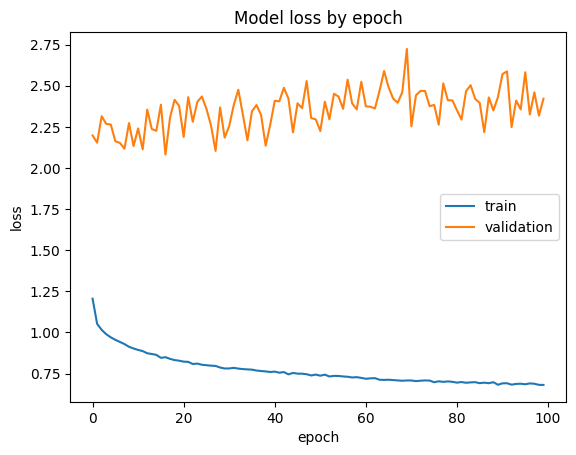

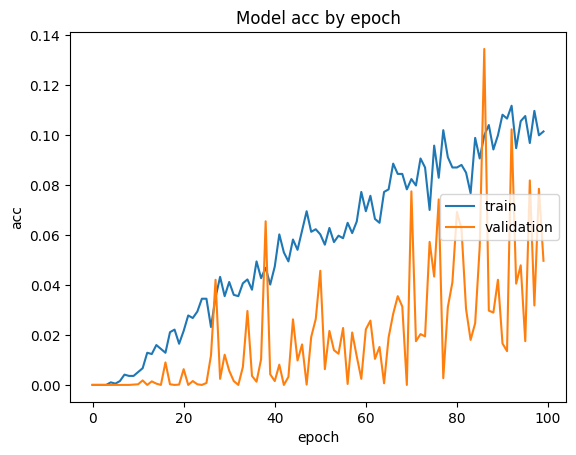

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='right')
plt.show()

plt.plot(history.history['recall_class_3'])
plt.plot(history.history['val_recall_class_3'])
plt.title('Model acc by epoch')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='right')
plt.show()
